In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\Admission_Prediction.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
for column in df:
    if df[column].isnull().any():
        if df[column].dtypes==object:
            df[column].fillna(df[column].mode()[0],inplace=True)
            print('{0} -- {1}'.format(column, df[column].isnull().sum()))
        elif df[column].dtypes==float:
            df[column].fillna(math.ceil(df[column].mean()),inplace=True)
            print('{0} -- {1}'.format(column, df[column].isnull().sum()))
        else:
            pass

GRE Score -- 0
TOEFL Score -- 0
University Rating -- 0


In [7]:
df.describe(include="float").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.57200,11.104207,290.00,309.0000,317.00,324.00,340.00
TOEFL Score,500.0,107.20400,6.052408,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.14800,1.138723,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
df.drop(columns= ["Serial No."], inplace=True)

In [9]:
df.corr()["Chance of Admit"].sort_values()

Research             0.545871
LOR                  0.645365
University Rating    0.668476
SOP                  0.684137
TOEFL Score          0.787074
GRE Score            0.802321
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

In [10]:
import pylab

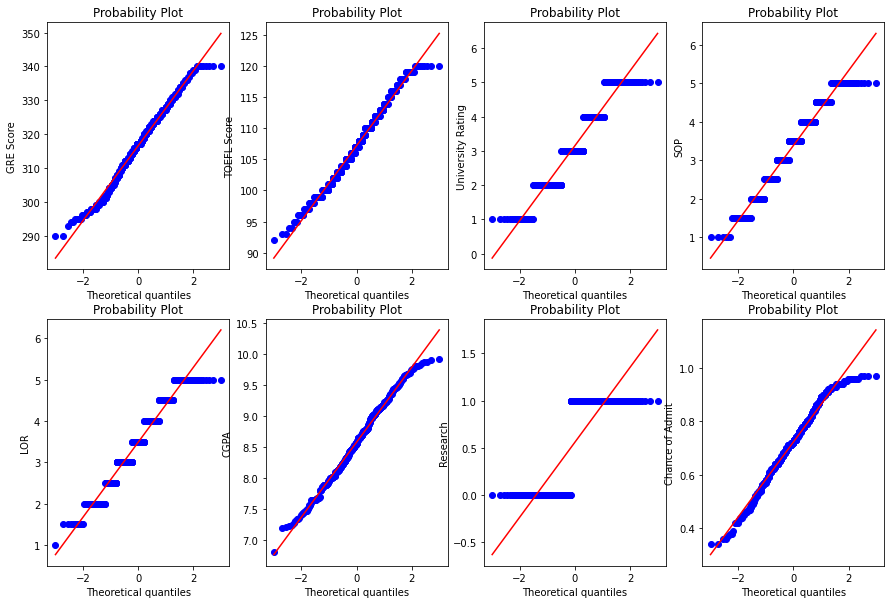

In [11]:
plt.figure(figsize=(15,10))
plot_num=1
for i in df.columns:
    if plot_num<9:
        plt.subplot(2,4,plot_num)
        st.probplot(df[i],dist="norm", plot=pylab)
        plt.ylabel(i)
        plot_num+=1

In [12]:
df.skew()

GRE Score           -0.056060
TOEFL Score          0.095007
University Rating    0.034189
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [13]:
df.kurt()

GRE Score           -0.612418
TOEFL Score         -0.619410
University Rating   -0.839730
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# for normalisation
X=df.drop(columns=["Chance of Admit"])
y=df["Chance of Admit"] 

In [16]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X_scaled,y, test_size=0.10,random_state=50)

In [19]:
print(X_train.shape)

(450, 7)


In [20]:
Y_train.shape

(450,)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
lr.intercept_

0.3492929177883569

In [24]:
lr.coef_

array([0.09472849, 0.06802531, 0.02361527, 0.00431358, 0.05875532,
       0.38532767, 0.02582543])

In [25]:
Y_pred=lr.predict(X_test)

In [26]:
Y_pred[0:5]

array([0.63226017, 0.56223289, 0.62435001, 0.52147796, 0.52387461])

In [27]:
Y_test[0:5]

331    0.73
374    0.39
434    0.64
354    0.59
345    0.49
Name: Chance of Admit, dtype: float64

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [29]:
r2_score(Y_test,Y_pred)

0.839163586540578

In [30]:
mse=mean_squared_error(Y_test,Y_pred)

In [31]:
np.sqrt(mse)

0.0599745408536532

In [32]:
mae= mean_absolute_error(Y_test,Y_pred)
mae

0.04462305749244545

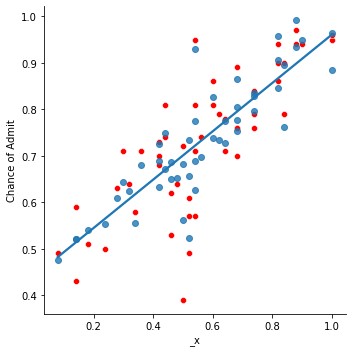

In [33]:
sns.relplot(X_test[:,0],Y_test, color= "Red" )
sns.regplot(X_test[:,0],Y_pred, ci=False)
plt.show()

In [34]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [35]:
lasso=Lasso()

In [36]:
lasso.fit(X_train,Y_train)

Lasso()

In [37]:
y_pred_lasso=lasso.predict(X_test)

In [38]:
y_pred_lasso=lasso.predict(X_test)

In [39]:
r2_score(Y_test,y_pred_lasso)

-0.0021632871170818024

In [40]:
Ridge=Ridge()

In [41]:
Ridge.fit(X_train,Y_train)

Ridge()

In [42]:
y_pred_Ridge=Ridge.predict(X_test)

In [43]:
r2_score(Y_test,y_pred_Ridge)

0.8407346366310403

In [44]:
elasticnet=ElasticNet()

In [45]:
elasticnet.fit(X_train,Y_train)

ElasticNet()

In [46]:
y_pred_elasticnet=elasticnet.predict(X_test)

In [47]:
r2_score(Y_test,y_pred_elasticnet)

-0.0021632871170818024

In [48]:
import statsmodels.api as sm

In [49]:
from statsmodels.regression.linear_model import OLS

In [50]:
ols=sm.OLS(y,X)

In [51]:
model= ols.fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              8145.
Date:                Sat, 23 Jul 2022   Prob (F-statistic):                        0.00
Time:                        12:26:09   Log-Likelihood:                          634.00
No. Observations:                 500   AIC:                                     -1254.
Df Residuals:                     493   BIC:                                     -1224.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0030      0.000     -8.740      0.000      -0.004      -0.002
TOEFL Score           0.0031      0.001      3.193      0.001       0.001       0.005
University Rating     0.0146      0.004      3.594      0.000       0.007       0.023
SOP                   0.0094      0.005      1.847      0.065      -0.001       0.019
LOR                   0.0179      0.005      3.796      0.000       0.009       0.027
CGPA                  0.1360      0.011     12.559      0.000       0.115       0.157
Research              0.0549      0.007      7.900      0.000       0.041       0.069
==============================================================================
Omnibus:                       76.313   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.565
Skew:                          -0.949   Prob(JB):                     1.47e-27
Kurtosis:                       4.525   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

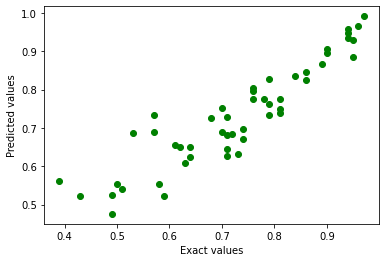

In [53]:
plt.scatter(Y_test, Y_pred,color='green')
plt.xlabel('Exact values', size = 10)
plt.ylabel('Predicted values', size = 10)
plt.show()